# Deep Learning MNIST Example

## <span style="font-size:25px">Deep Learning development Process (Image data)</span>

<table style="font-size:20px">
<tr>
<td style="text=align:center;width:125px;">
- 데이터 정의
</td>
<td style="text-align:left;width:1000;">
- TensorFlow 2.x에서는 MNIST, Fashion-MNIST, Cifar10과 같은 학습 데이터 셋은 
<br>load_data()를 이용하여 불러올 수 있음. 즉 해당되는 데이터 셋을 import한 후에, 
<br> 다음과 같이 mnist.load_data(), fashion_mnist.load_data(), cifar10.load_data() 
<br>사용하여 데이터 셋을 불러올 수 있음
</td>
</td>

<tr>
<td style="text=align:center">
- 데이터 전처리
</td>
<td style="text-align:left;width:1000;">
- 학습 데이터가 이미지인 경우에는, 학습 데이터에 대한 정규화(normalization)와 
<br>원핫 인코딩(one-hot encoding)과 같은 데이터 전처리(preprocessing)가 필요함. 
<br>일반적으로 이러한 정규화는 MinMax 또는 표준화 알고리즘을 사용하며, 원핫 인코
<br>딩은 TensorFlow 2.x에서는 to_categorical() API를 이용하여 수행됨
</td>
</td>


<tr>
<td style="text=align:center">
- 모델 구축
</td>
<td style="text-align:left;width:1000;">
- 모델(model) 생성하고 model.add()를 통해서 입력층, 은닉층, 출력층을 구축함.
<br>이때 은닉층 부분은 일반적인 ANN에서 Dense()를 사용하지만, CNN에서는 
<br>Conv2D(), MaxPool2D(), Flatten() 등으로 은닉층 부분을 구성함.
</td>
</td>

<tr>
<td style="text=align:center">
- 모델 컴파일
</td>
<td style="text-align:left;width:1000;">
- model.compile() API를 이용하여 optimizer, loss function 등을 지정함. 이때 학습 
<br>데이터의 정답을 원핫 인코딩 방식으로 설정했다면 loss function을 나타내는 
<br>부분은 loss='categorical_crossentropy' 형식으로 나타내며, 원핫 인코딩 방식이 
<br>아니라면 loss='sparse_categorical_crossentropy' 형식으로 지정함
</td>
</td>

<tr>
<td style="text=align:center">
- 학습
</td>
<td style="text-align:left;width:1000;">
- model.fit() API를 이용하여 이미지 데이터에 대한 학습을 진행함
</td>
</td>

<tr>
<td style="text=align:center">
- 모델 평가
</td>
<td style="text-align:left;width:1000;">
- model.evaluate() API를 이용해서 테스트 데이터에 대한 정확도를 측정하며, 혼동 
<br>행렬(confusion matrix)을 사용하던 우리가 구축한 모델(model)의 강점과 약점, 즉 
<br>어떤 데이터에 대해서 우리 모델이 혼란스러워 하는 지 등을 파악 할 수 있음.
</td>
</td>

## <span style="font-size:25px">Data Preprocessing (normalization, Standardization, one-hot encoding)</span>

<dl style="font-size:20px;">
<dt>
▶ 정규화(Normalization)
</dt><br>

<dt>
- 딥러닝에서 입력 데이터의 상대적 크기에 대한 영향을 줄이기 위해서, 다음과 같은 MinMax
<br>공식을 이용해서 모든 데이터 범위를 0~1 사이의 값으로 변화시키는 과정
</dd>
</dl>

$
\text{data}_{\text{new}} = \frac{\text{data - Min}}{\text{Max - Min}}
\qquad\qquad
\boxed{
  [\, 0,\, 52,\, 255 \,] \,
  \xRightarrow{정규화} \,
  [\, 0,\, 0.2,\, 1.0 \,]
}
$

<div style="border-top: 3px dashed rgb(122, 207, 125);margin: 20px;width: 50%;"></div>


<dl style="font-size:20px;">
<dt>
▶ 표준화(Standardization)
</dt><br>

<dt>
- 딥러닝 모델이 더 높은 precision을 가질 수 있도록, 다음과 같이 데이터 평균(Mean)과
<br>표준편차(Std)를 이용하여 특정 범위를 벗어난 데이터는 outlier로 간주하여 제거하는 과정
</dd>
</dl>

$
\text{data}_{\text{new}} = \frac{\text{data - Mean}}{\text{Std}}
\qquad\qquad
\boxed{
  [\, 0,\, 52,\, 255 \,] \,
  \xRightarrow{표준화} \,
  [\, -1.13,\, -0.95,\, 1.52 \,]
}
$

<div style="border-top: 3px dashed rgb(122, 207, 125);margin: 20px;width: 50%;"></div>

<dl style="font-size:20px;">
<dt>
▶ 원핫 인코딩(One-Hot Encoding)
</dt><br>

<dt>
① 정답 개수와 동일한 크기를 가지는 리스트를 만든 후에
<br>② 정답에 해당하는 리스트의 인덱스 값에는 1을 넣고,
<br>나머지 인덱스에는 모두 0을 넣어 정답을 표현하는 방식.
<br><br>즉 리스트에서 가장 큰값을 가지는 인덱스를 정답으로 인식
</dd>
</dl>

## <span style="font-size:25px">Example</span>

<span style="font-size:20px">데이터 불러오기 및 확인</span>

In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape =', x_train.shape, ', train label shape =', t_train.shape)
print('\n test shape =', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label =', t_train)   # 학습 데이터 정답 출력
print('\n test label =', t_test)     # 테스트 데이터 정답 출력


 train shape = (60000, 28, 28) , train label shape = (60000,)

 test shape = (10000, 28, 28) , test label shape = (10000,)

 train label = [5 0 4 ... 5 6 8]

 test label = [7 2 1 ... 4 5 6]


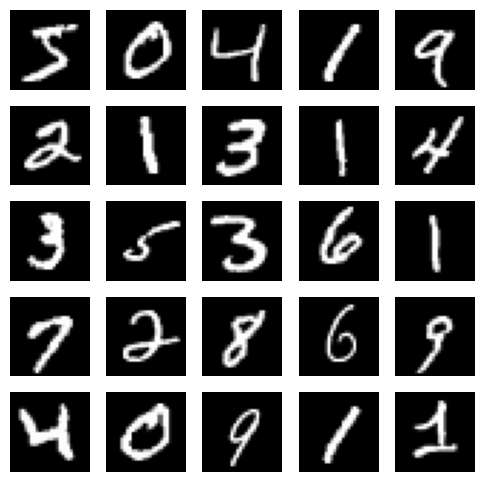

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))    # 25개의 이미지 출력

for index in range(25):

  plt.subplot(5, 5, index + 1)    # 5행, 5열, 그림 0~24까지 순서대로
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()

<span style="font-size:20px">데이터 전처리(정규화, 원핫 인코딩)과, 모델 구축 및 컴파일</span>

In [4]:
# 학습 데이터/테스트 데이터 정규화(Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩(One-Hot Encoding)

from tensorflow.keras.utils import to_categorical

t_train = to_categorical(t_train, num_classes=10)
t_test = to_categorical(t_test, num_classes=10)

In [5]:
# 모델 구축

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # Flatten 없이 사용하려면 차원이 1D이어야 한다.
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# 모델 컴파일

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<span style="font-size:20px">데이터 학습과 평가</span>

In [10]:
# 데이터 학습

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3, verbose=1)

Epoch 1/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0794 - accuracy: 0.9762 - val_loss: 0.1249 - val_accuracy: 0.9621
Epoch 2/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0613 - accuracy: 0.9819 - val_loss: 0.1128 - val_accuracy: 0.9663
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.0986 - val_accuracy: 0.9707
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0996 - val_accuracy: 0.9710
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.1057 - val_accuracy: 0.9714
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.1084 - val_accuracy: 0.9707
Epoch 7/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.1065 - val_accuracy:

In [11]:
# 모델 평가

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1400 - accuracy: 0.9754


[0.13997189700603485, 0.9753999710083008]

<span style="font-size:20px">데이터 손실과 정확도 트랜드</span>

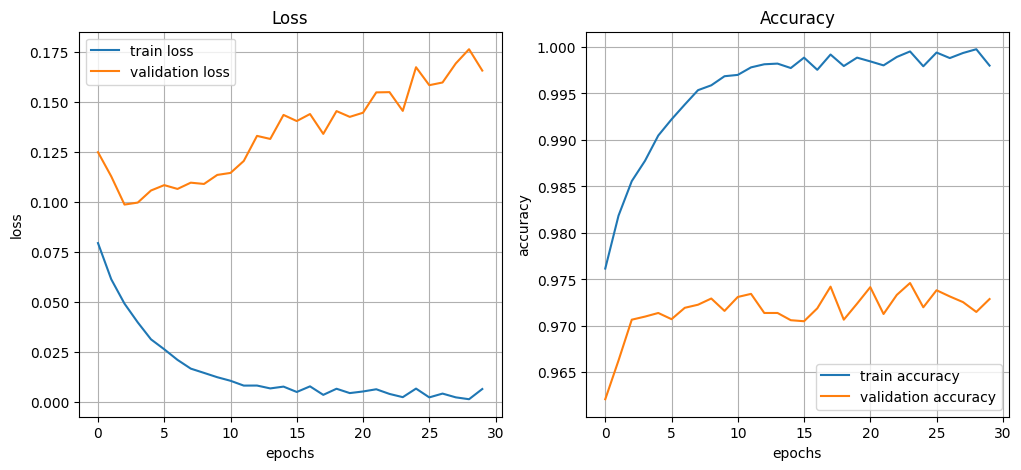

In [14]:
# 출력 방식
plt.figure(figsize=(12, 5))

# Loss Trend

plt.subplot(1, 2, 1)    # 1행, 2열, 1번째
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

# Accuarcy Trend

plt.subplot(1, 2, 2)    # 1행, 2열, 2번째
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')


plt.show()

<span style="font-size:20px">혼동 행렬(confusion matrix)</span>

313/313 [==============================] - 1s 2ms/step


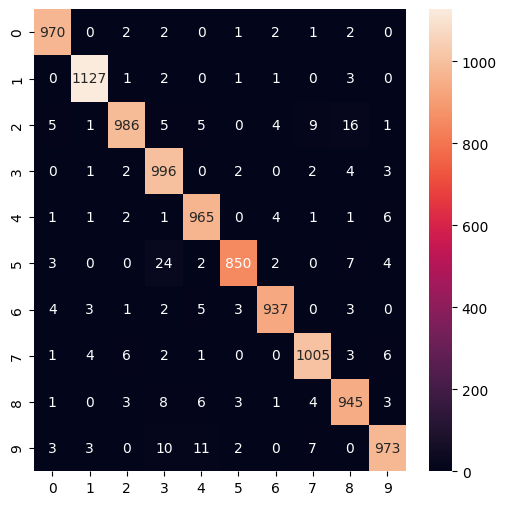

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [21]:
print(cm)
print('\n')

min_accuracy = []

for i in range(10):

  accuracy = np.max(cm[i]) / np.sum(cm[i])

  print(('label = %d\t(%d/%d)\taccuracy = %.3f') %
        (i, np.max(cm[i]), np.sum(cm[i]), accuracy))

  min_accuracy.append(accuracy)

min_accuracy_label = np.argmin(min_accuracy)

print(('\n가장 학습률이 떨어진 label: %d\taccuracy = %.3f') %
      (min_accuracy_label, np.min(min_accuracy)))

[[ 970    0    2    2    0    1    2    1    2    0]
 [   0 1127    1    2    0    1    1    0    3    0]
 [   5    1  986    5    5    0    4    9   16    1]
 [   0    1    2  996    0    2    0    2    4    3]
 [   1    1    2    1  965    0    4    1    1    6]
 [   3    0    0   24    2  850    2    0    7    4]
 [   4    3    1    2    5    3  937    0    3    0]
 [   1    4    6    2    1    0    0 1005    3    6]
 [   1    0    3    8    6    3    1    4  945    3]
 [   3    3    0   10   11    2    0    7    0  973]]


label = 0	(970/980)	accuracy = 0.990
label = 1	(1127/1135)	accuracy = 0.993
label = 2	(986/1032)	accuracy = 0.955
label = 3	(996/1010)	accuracy = 0.986
label = 4	(965/982)	accuracy = 0.983
label = 5	(850/892)	accuracy = 0.953
label = 6	(937/958)	accuracy = 0.978
label = 7	(1005/1028)	accuracy = 0.978
label = 8	(945/974)	accuracy = 0.970
label = 9	(973/1009)	accuracy = 0.964

가장 학습률이 떨어진 label: 5	accuracy = 0.953
